# Machine Learning Project 2022/2023 - Group 60 2 Version <img align='right' width='100' height='125' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>





### Group Members:
Beatriz Carmo - 20220685<br>
João Malho - 20220696<br>
Lizaveta Baryionak - 20220667<br>
Marta Antunes - 20221094<br>
Tomás Silva - 20221639

***
# 1. Loading Data
<ul>
    <li>Import necessary libraries</li>
    <li>Merge trainning data and testing data in two distinct tables</li>   
</ul>

***

In [1]:
%autosave 90

# Basic libraries: numpy and pandasfor data handling, pyplot 
# and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
import os
from PIL import Image
import requests
from sklearn.metrics import log_loss

# Data split
from sklearn.model_selection import train_test_split

# Scaling methods and categorical variable encoder
from sklearn.preprocessing import LabelEncoder

# Model selection 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score ,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Addicional 
from datetime import datetime
from datetime import date


Autosaving every 90 seconds


In [2]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [3]:
# Join all the trainning data in 1 dataframe 

#train_demo.set_index('PatientID')
#train_habits.set_index('PatientID')
#train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
#train_full.set_index('PatientID', inplace=True)
train_df = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

#test_demo.set_index('PatientID')
#test_habits.set_index('PatientID')
#test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
#test_full.set_index('PatientID', inplace=True)
test_df = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_df.head().style

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline diabetes
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline diabetes


In [6]:
# Checking how the testing dataframe is

train_df.head().style

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline diabetes
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline diabetes


In [7]:
#checking the shape of each data set
print('There are ', train_df.shape[0], 'rows and ', train_df.shape[1], 'columns on the train set.')
print('There are ', test_df.shape[0], 'rows and ', test_df.shape[1], 'columns on the test set.')

There are  800 rows and  19 columns on the train set.
There are  225 rows and  18 columns on the test set.


In [8]:
#checking for duplicates with all columns in both sets
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

In [9]:
#checking numeric stats
train_df[train_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,800.0,1513.99875,300.874630,1001.0,1247.50,1519.5,1777.25,2024.0
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.00,1993.0
Disease,800.0,0.51375,0.500124,0.0,0.00,1.0,1.00,1.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.00,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.00,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.00,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.00,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.00,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.00,30.0


***
# 2. Data Preprocessing for Train and Test Data
<ul>
    <li>Check Null and cleaning it</li>
    <li>Check the existance of Outliers</li>
    <li>Check the spearman correlation between variables</li>
    <li>Change the categorical variables into numeric variables</li>
</ul>

***   

## __Training Data__ 

***

In [10]:
# check for null values

train_df.isnull().sum()

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
dtype: int64

In [14]:
# visual null values

train_df[train_df['Education'].isnull()]

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
5,1653,Mr. David Lamothe,1966,East Midlands,NaN,0,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,167,49,287,130,7,7,Not sure,Neither I nor my immediate family have diabetes.
54,1085,Mr. Robert Swenson,1978,South West,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,165,72,224,120,22,0,More than 3 years,I do have diabetes
86,1048,Mrs. Margaret Wysong,1956,East Midlands,NaN,1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,166,67,282,146,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
124,1128,Mr. John Castillo,1970,South East,NaN,1,No,I usually consume alcohol every day,No,More than six pieces of fruit,Less than half a liter,167,74,227,138,22,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
239,1241,Mr. Tommy Jenkins,1955,London,NaN,0,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,55,216,152,18,3,Not sure,I have/had pregnancy diabetes or borderline di...
286,1195,Mr. John Hess,1963,London,NaN,1,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,174,84,216,150,19,7,More than 3 years,I have/had pregnancy diabetes or borderline di...
341,1296,Mr. Terry Roberts,1955,South East,NaN,0,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,162,54,241,120,0,4,More than 3 years,Neither I nor my immediate family have diabetes.
355,1904,Mr. Manuel Rothwell,1967,East Midlands,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,178,82,266,130,19,0,More than 3 years,I do have diabetes
432,1664,Mrs. Jan Campbell,1956,East Midlands,NaN,1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,167,50,230,150,9,12,More than 3 years,"I don't have diabetes, but I have direct famil..."
436,1802,Mrs. Mary Rey,1959,South West,NaN,0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,151,47,201,124,14,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [20]:
train_df['Education'].mode()[0]

'University Complete (3 or more years)'

In [23]:
# Fill Nan for Mode of Education, once columns Education is the only one with Nans 
train_df = train_df.fillna(train_df['Education'].mode()[0])
train_df

,PatientID,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
796,1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
797,1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,No,I consider myself a social drinker,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.
798,1662,Mr. Florencio Doherty,1975,East of England,Elementary School (1st to 9th grade),1,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,165,75,208,112,16,0,More than 3 years,Neither I nor my immediate family have diabetes.


In [24]:
# Check data without nulls
train_df.isnull().sum()

PatientID           0
Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
dtype: int64

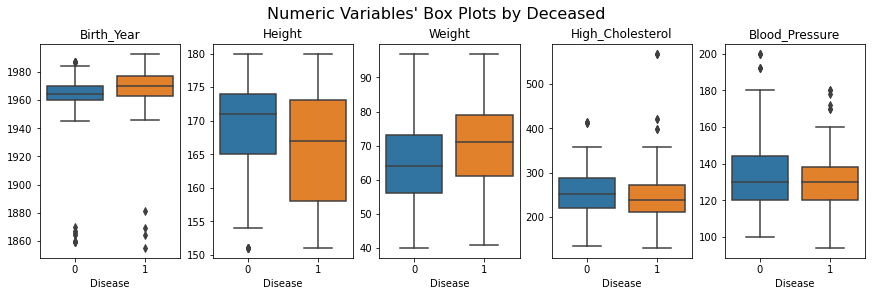

In [29]:
#divide data into numeric and non-numeric features
metric_feat=['Birth_Year', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure']
categorical_feat= ['Region', 'Education', 'Smoking_Habit', 'Drinking_Habit', 'Exercise', 'Fruit_Habit',
                 'Water_Habit', 'Mental_Health', 'Physical_Health', 'Checkup', 'Diabetes']
#excluding name since it is not an important feature

features=metric_feat+['Disease']

fig, axes = plt.subplots(1, len(metric_feat), figsize=(12, 4), constrained_layout=True)

for ax, f in zip(axes.flatten(), features):
    sns.boxplot(y=f, data=train_df, ax=ax, x='Disease')
    ax.set_title(f)
    ax.set_ylabel('') 
        
plt.suptitle("Numeric Variables' Box Plots by Deceased", fontsize=16)
plt.show()

In [30]:
#check incoherence in Region - repeated regions written in a different way 
train_df.Region.unique(), test_df.Region.unique()

(array(['London', 'South West', 'Yorkshire and the Humber', 'South East',
        'East Midlands', 'West Midlands', 'East of England', 'North West',
        'North East', 'LONDON'], dtype=object),
 array(['East Midlands', 'Yorkshire and the Humber', 'West Midlands',
        'North East', 'South West', 'London', 'South East',
        'East of England', 'North West'], dtype=object))

In [31]:
#check incoherences in Education
train_df.Education.unique(), test_df.Education.unique()

(array(['High School Incomplete (10th to 11th grade)',
        'Elementary School (1st to 9th grade)',
        'University Complete (3 or more years)',
        'University Incomplete (1 to 2 years)', 'High School Graduate',
        'I never attended school / Other'], dtype=object),
 array(['Elementary School (1st to 9th grade)',
        'University Complete (3 or more years)',
        'High School Incomplete (10th to 11th grade)',
        'High School Graduate', 'University Incomplete (1 to 2 years)',
        'I never attended school / Other'], dtype=object))

In [32]:
#checking incoherences between education and year of birth
#assuming one cannot attend University being less than 17 years-old 
(((train_df.Education=='University Complete (3 or more years)')\
 |(train_df.Education=='University Incomplete (1 to 2 years)'))\
 & (train_df.Birth_Year>2005)).sum() ,(((test_df.Education=='University Complete (3 or more years)')\
 |(test_df.Education=='University Incomplete (1 to 2 years)'))\
 & (test_df.Birth_Year>2005)).sum()

(0, 0)

In [33]:
#check Smoking_Habit
train_df.Smoking_Habit.unique(), test_df.Smoking_Habit.unique()

(array(['No', 'Yes'], dtype=object), array(['Yes', 'No'], dtype=object))

In [34]:
#check Drinking_Habit
train_df.Drinking_Habit.unique(), test_df.Drinking_Habit.unique()

(array(['I usually consume alcohol every day',
        'I consider myself a social drinker',
        'I do not consume any type of alcohol'], dtype=object),
 array(['I usually consume alcohol every day',
        'I consider myself a social drinker',
        'I do not consume any type of alcohol'], dtype=object))

In [35]:
#check Exercise
train_df.Exercise.unique(), test_df.Exercise.unique()

(array(['Yes', 'No'], dtype=object), array(['No', 'Yes'], dtype=object))

In [36]:
#check Fruit_Habit
train_df.Fruit_Habit.unique(), test_df.Fruit_Habit.unique()

(array(['Less than 1. I do not consume fruits every day.',
        '1 to 2 pieces of fruit in average',
        '3 to 4 pieces of fruit in average',
        '5 to 6 pieces of fruit in average',
        'More than six pieces of fruit'], dtype=object),
 array(['Less than 1. I do not consume fruits every day.',
        '5 to 6 pieces of fruit in average',
        '3 to 4 pieces of fruit in average',
        '1 to 2 pieces of fruit in average',
        'More than six pieces of fruit'], dtype=object))

In [37]:
#check Water_Habit
train_df.Water_Habit.unique(), test_df.Water_Habit.unique()

(array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object),
 array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object))

In [38]:
#check Water_Habit
train_df.Water_Habit.unique(), test_df.Water_Habit.unique()

(array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object),
 array(['Between one liter and two liters',
        'More than half a liter but less than one liter',
        'Less than half a liter'], dtype=object))

In [39]:
#check Diabetes
train_df.Diabetes.unique(), test_df.Diabetes.unique()

(array(['Neither I nor my immediate family have diabetes.',
        'I have/had pregnancy diabetes or borderline diabetes',
        'I do have diabetes',
        "I don't have diabetes, but I have direct family members who have diabetes."],
       dtype=object),
 array(['I have/had pregnancy diabetes or borderline diabetes',
        'I do have diabetes',
        'Neither I nor my immediate family have diabetes.',
        "I don't have diabetes, but I have direct family members who have diabetes."],
       dtype=object))

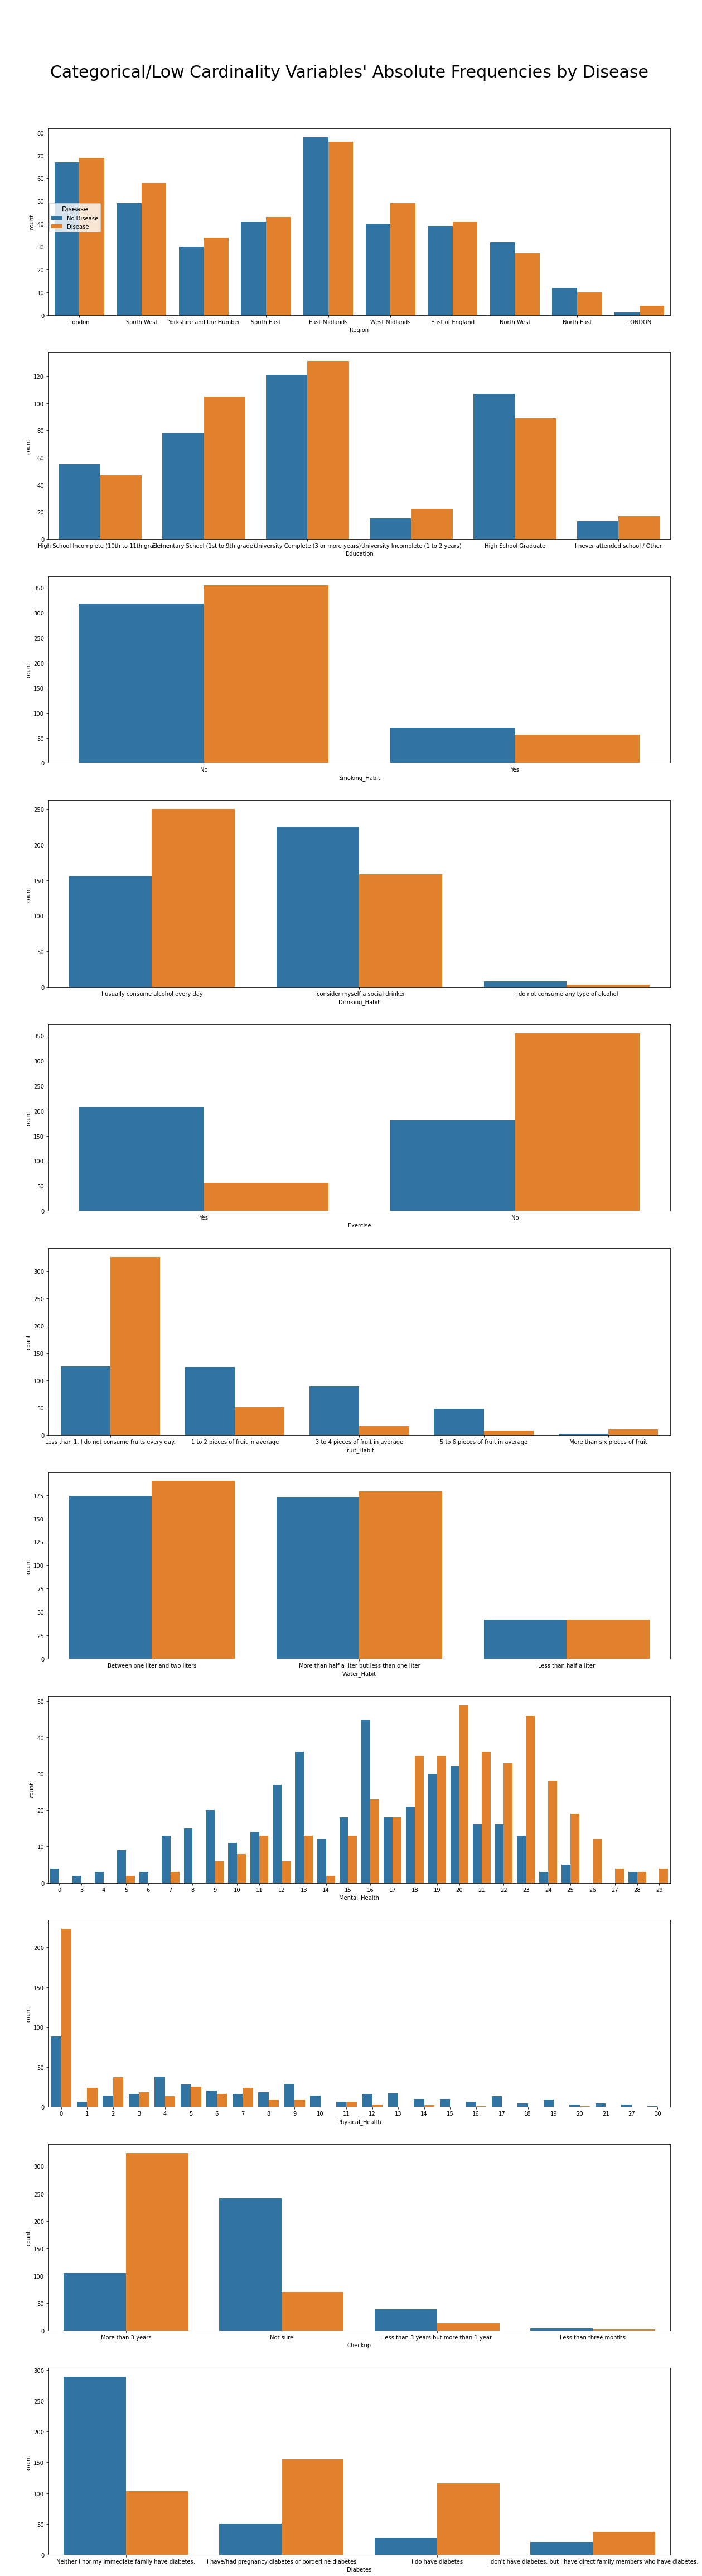

In [41]:
fig, axes = plt.subplots(11, math.floor(len(categorical_feat)/11), figsize=(20,80))

for ax, x in zip(axes.flatten(), categorical_feat):
    if x == "Disease":
        sns.countplot(x=x, hue="Disease", order=[0, 1], data=df, ax=ax)
    else:
        sns.countplot(x=x, hue="Disease", data=train_df, ax=ax)
    ax.get_legend().remove()

handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ["No Disease", "Disease"], loc=(0.07,0.91), title="Disease", title_fontsize=12)

plt.subplots_adjust(wspace=0.25)
plt.suptitle("Categorical/Low Cardinality Variables' Absolute Frequencies by Disease", y=0.90, fontsize=30)

plt.show()

In [42]:
# Investigate all elements within each feacture

for column in train_df:
    unique_values = np.unique(train_df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))
    
    

The number of values for feature PatientID is: 800
The number of values for feature Name is: 799
The number of values for feature Birth_Year is: 50
The number of values for feature Region is: 10
The number of values for feature Education is: 6 -- ['Elementary School (1st to 9th grade)' 'High School Graduate'
 'High School Incomplete (10th to 11th grade)'
 'I never attended school / Other' 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)']
The number of values for feature Disease is: 2 -- [0 1]
The number of values for feature Smoking_Habit is: 2 -- ['No' 'Yes']
The number of values for feature Drinking_Habit is: 3 -- ['I consider myself a social drinker'
 'I do not consume any type of alcohol'
 'I usually consume alcohol every day']
The number of values for feature Exercise is: 2 -- ['No' 'Yes']
The number of values for feature Fruit_Habit is: 5 -- ['1 to 2 pieces of fruit in average' '3 to 4 pieces of fruit in average'
 '5 to 6 pieces of fruit in average'

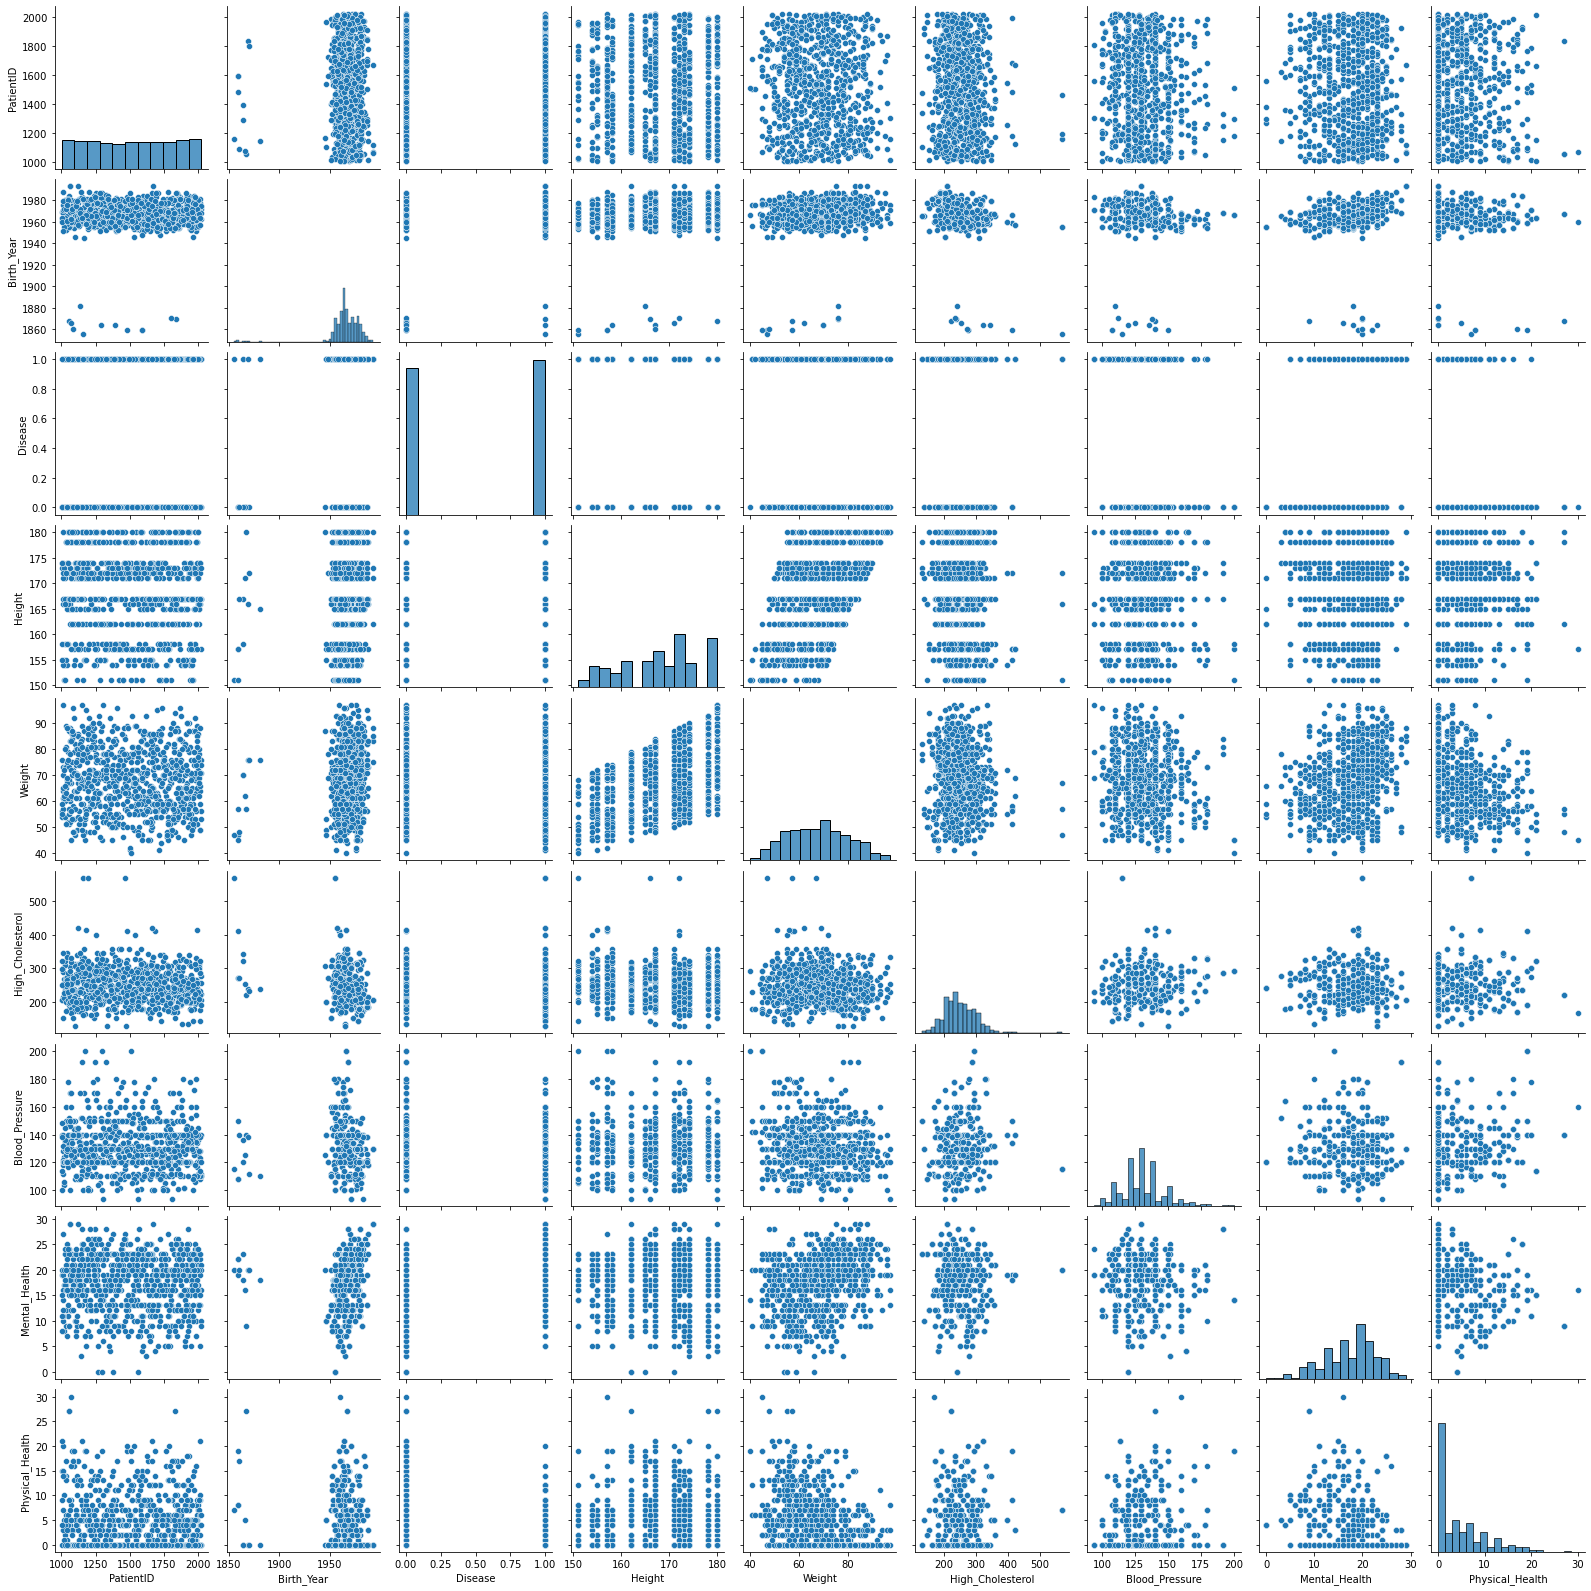

In [43]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_df)


## __Testing Data__ 

***
<ul>
    <li>Once we dont have Outliers in Testing Data we dont need to work over those</li>
</ul>



In [ ]:
# check for null values

test_df.isnull().sum()

In [ ]:
# Investigate all elements within each feacture

for column in test_df:
    unique_values = np.unique(test_df[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))
    
    

In [ ]:
# Visualize the data using pairplots
print('There is no Outliers in Test Data')
pairplots = sns.pairplot(test_df)


***
# 3. Data Cleaning for Train and Test Data
<ul>
    <li>Changing capital words</li>
    <li>Removing outliers</li>
    <li>Change categorical variables into numeric representation</li>
<ul>
    
***

>### A. Training Data

***

In [ ]:
# Change the LONDON to London in Training df

train_df['Region'] = train_df['Region'].replace(['LONDON'], 'London')
train_df.info()

In [ ]:
print(train_df.columns)


In [ ]:
# Deleting the outliers

train_df[train_df['Birth_Year'] < 1900]

In [ ]:
# Droping elements that have been born after 1900 once we can check that are outliers

train_df = train_df[train_df['Birth_Year'] > 1900]

In [ ]:
# Visualize the data using pairplots

pairplots = sns.pairplot(train_df)


In [ ]:
# We also can regard patients with cholesterol of more then 500 as outliers

train_df[train_df['High_Cholesterol'] > 500]

In [ ]:
# Drop 500+ cholesterol patients
train_df = train_df[train_df['High_Cholesterol'] < 500]

In [ ]:
pairplots = sns.pairplot(train_df)

In [ ]:
# First Visual Correlations with variable Disease

pairplots_disease = sns.pairplot(train_df, hue = 'Disease')

In [ ]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_df.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

In [ ]:
# Investigate the dist of y

sns.countplot(x = 'Disease', data = train_df, palette = 'Blues')
print('\033[1mWe can check that variable y (Disease) is balanced\033[0m')


In [ ]:
# Change Yes and No to 1 and 0s

train_df['Exercise'] = train_df['Exercise'].map({'Yes': 1, 'No': 0})
train_df['Smoking_Habit'] = train_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
train_df

In [ ]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID = train_df[['PatientID','Name']]
PatientNameID

# Drop Name, once those are already saved in other df, in order to have only numerica features 
train_df.drop('Name', axis= 1, inplace = True)


In [ ]:
# Change categorical variables into numeric representation

categorical_features = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
train_df = pd.get_dummies(train_df, columns = categorical_features)
train_df

>### B. Testing Data

***

In [ ]:
# No case sentitivity problems in London in Testing df

test_df['Region'].unique()

In [ ]:
# Visualize the data using pairplots

pairplots = sns.pairplot(test_df)

In [ ]:
# By spearman correlation we can check correlation between each element

correlation_spearman = test_df.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

In [ ]:
# Change Yes and No to 1 and 0s

test_df['Exercise'] = test_df['Exercise'].map({'Yes': 1, 'No': 0})
test_df['Smoking_Habit'] = test_df['Smoking_Habit'].map({'Yes': 1, 'No': 0})
test_df

In [ ]:
# Separate names with Patient ID for a separated DataFrame 

PatientNameID_test = test_df[['PatientID','Name']]
PatientNameID_test

# Drop Name, once those are already saved in other df, in order to have only numerica features 
test_df.drop('Name', axis= 1, inplace = True)


In [ ]:
# Check the objects in testing df
test_df.info()

In [ ]:
# Change categorical variables into numeric representation

categorical_features_test = ['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']
test_df = pd.get_dummies(test_df, columns = categorical_features_test)
test_df

***
# 4. Feature Selection
<ul>
    <li>Split the data into X and y</li>
    <li>Run a Tree-based estimators</li>
    <li>Run Feature Importance</li>
    <li>Split the data into new variables only regarding the importante variables</li>
</ul>

***

In [ ]:
# Split the data into x and y

X = train_df.drop(['Disease'], axis = 1).values 
y = train_df['Disease']

In [ ]:
DecisionTree = DecisionTreeClassifier(random_state=15, criterion= 'entropy',max_depth=10)
DecisionTree.fit(X,y)

In [ ]:
# Feature Importance

fi_col = []
fi = []

for i,column in enumerate(train_df.drop(['Disease'], axis = 1)):
    fi_col.append(column)
    fi.append(DecisionTree.feature_importances_[i])

fi_DecisionTree = pd.DataFrame(zip(fi_col, fi), columns = ['Feature','Feature Importance'])
fi_DecisionTree = fi_DecisionTree.sort_values('Feature Importance', ascending = False).reset_index().drop('index',axis=1)
fi_DecisionTree

In [ ]:
# Creating list of columns to keep, only include feactures that contribute to model prediction
# Only regarding Importance above 0.02

DecisionTree_columns_to_keep = fi_DecisionTree['Feature'][0:10]

DecisionTree_columns_to_keep

In [ ]:
# Correlations analysis
# Plot
cmap = sns.color_palette('Blues', as_cmap=True)

# Computing the correlation matrix
corr = train_df[DecisionTree_columns_to_keep].corr('spearman')

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize = (45, 26))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = 1, cbar_kws = {'shrink': 0.5}, annot = True, fmt = '.2f', annot_kws={"size":20})

#customize
plt.title('Correlation Heatmap',fontsize = 40, fontweight = 'bold')


plt.show()

In [ ]:
# Saving train_data with the necessary columns

train_df = train_df[[
             'Checkup_More than 3 years',
             'Birth_Year',
             'Diabetes_Neither I nor my immediate family have diabetes.',
             'Mental_Health',
             'Fruit_Habit_Less than 1. I do not consume fruits every day.',  
             'High_Cholesterol', 
             'Physical_Health',
             'Blood_Pressure',
             'Weight',
             'Fruit_Habit_1 to 2 pieces of fruit in average',
             'Disease',
             'PatientID'
            ]] 


train_df

In [ ]:
# Split data again

# Creating a new x but now only regarding the columns that have impact in prediction model
# Define y again

X = train_df.drop('Disease', axis = 1).values
X

y = train_df['Disease']
y

In [ ]:
# First split
X_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    test_size = 0.2,
                                                    random_state = 15)

# Second split
X_train, x_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  train_size = 0.9,
                                                  test_size = 0.1,
                                                  random_state = 15)

print(X_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

# IMPORTANTE : the larger the 'test_size' the highest the accurancy  

In [ ]:
ax = sns.countplot(x = y_train, palette = 'Blues')

### Teorical definition of Linear and Logistic Regression 

In [ ]:
im = Image.open(requests.get('https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/2_what-is-logistic-regression.jpeg', stream=True).raw)
im 

***
# 5. Running Models in Training Environment
<ul>
    <li>Trainning our model</li>
    <li>Predict</li>
    <li>Get Coeficiente, Scores and Accuracy</li>
</ul>

***

>### A. Logistic Regression Model

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [ ]:
# Trainning our model

logistic_regression_model = LogisticRegression(random_state = 10, solver='lbfgs')
logistic_regression_model.fit(X_train, y_train)


In [ ]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_logistic_regression = logistic_regression_model.predict(x_test)
y_pred_logistic_regression

# predict_proba - Probability estimates 

y_pred_proba_logistic_regression = logistic_regression_model.predict_proba(x_test)

# coef_ - Coefficient of the features in the decision function

coef_logistic_regression = logistic_regression_model.coef_


In [ ]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)




>### B. Decision Tree Model

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [ ]:
# Trainning our model

decision_tree_model = DecisionTreeClassifier(class_weight = 'balanced',
                                             criterion = 'entropy',
                                             max_depth = 11,
                                             min_samples_split = 4, 
                                             random_state = 10)
decision_tree_model.fit(X_train, y_train)


In [ ]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_decision_tree = decision_tree_model.predict(x_test)
y_pred_decision_tree

# predict_proba - Probability estimates 

y_pred_proba_decision_tree = decision_tree_model.predict_proba(x_test)


In [ ]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)




>### C. Random Forest Model

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [ ]:
# Trainning our model

random_forest_model = RandomForestClassifier(criterion = 'entropy',
                                 max_depth = 50,
                                 min_samples_split = 2,
                                 max_features = 'auto',
                                 bootstrap = False,
                                 min_samples_leaf = 1,
                                 random_state = 30,
                                 n_estimators = 10)
random_forest_model.fit(X_train, y_train)


In [ ]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_random_forest = random_forest_model.predict(x_test)
y_pred_random_forest

# predict_proba - Probability estimates 

y_pred_proba_random_forest = random_forest_model.predict_proba(x_test)


In [ ]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)




>### D. K Nearest Neighbors Model (KNN)

***
<ul>
        <li>Accuracy on Train and Test</li>
        <li>Classification Report</li>
        <li>Confusion Matrix</li>
        <li>Sensitivity, hit rate, recall, or positive rate</li>
        <li>Precision</li>
        <li>Positive Precision Value</li>
</ul>

In [ ]:
# Trainning our model
    # p = 1 - Manhatan Distance; 2 - Euclidean Distance

KNN_model = KNeighborsClassifier(n_neighbors = 1,
                                 leaf_size = 1,
                                 p = 1)

KNN_model.fit(X_train, y_train)


In [ ]:
# predict - Predict class labels for samples in x
    # Have the shape correct, because this prediction have 557 results which is the same number of results in x_train

y_pred_KNN_model = KNN_model.predict(x_test)
y_pred_KNN_model

# predict_proba - Probability estimates 

y_pred_proba_KNN_model = KNN_model.predict_proba(x_test)


In [ ]:
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_test, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)

***
# 6. Conclusion and Results
<ul>
    <li>Results and Models performance over Training Data</li>
    <li>Results and Models performance over Testing Data</li>
</ul>

***

>### A.Training Data

***

>>#### A. Logistic Regression Model

In [ ]:
## LOGISTIC REGRESSION MODEL

print('\n\n\n------------------------','\033[1m TRAINING ENVIRONMENT\033[0m','------------------------\n')

print('------------------------','\033[1m Logistic Regression Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', logistic_regression_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', logistic_regression_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_logistic_regression))

# Confusion Matrix function

cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_logistic_regression.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_logistic_regression.flatten()/np.sum(cm_logistic_regression)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_logistic_regression, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_logistic_regression = cm_logistic_regression.sum(axis=0) - np.diag(cm_logistic_regression)

FN_logistic_regression = cm_logistic_regression.sum(axis=1) - np.diag(cm_logistic_regression)

TP_logistic_regression = np.diag(cm_logistic_regression)

TN_logistic_regression = cm_logistic_regression.sum() - (FP_logistic_regression - FN_logistic_regression - TP_logistic_regression)

# Sensitivity, hit rate, recall, or positive rate

TPR_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FN_logistic_regression)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_logistic_regression)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_logistic_regression.sum()/2)
print('\nThis reflect that out of the total Diseased have 0,8202 of them correct, and out of the tota Non Diseased have 0,9103 of them correct.')

# Precision or positive predictive value

PPV_logistic_regression = TP_logistic_regression / (TP_logistic_regression + FP_logistic_regression)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_logistic_regression.sum()/2)


## DECISION TREE MODEL

print('\n\n\n------------------------','\033[1m Decision Tree Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', decision_tree_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', decision_tree_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix function

cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_decision_tree.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_decision_tree.flatten()/np.sum(cm_decision_tree)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_decision_tree, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_decision_tree = cm_decision_tree.sum(axis=0) - np.diag(cm_decision_tree)

FN_decision_tree = cm_decision_tree.sum(axis=1) - np.diag(cm_decision_tree)

TP_decision_tree = np.diag(cm_decision_tree)

TN_decision_tree = cm_decision_tree.sum() - (FP_decision_tree - FN_decision_tree - TP_decision_tree)

# Sensitivity, hit rate, recall, or positive rate

TPR_decision_tree = TP_decision_tree / (TP_decision_tree + FN_decision_tree)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_decision_tree)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_decision_tree.sum()/2)

# Precision or positive predictive value

PPV_decision_tree = TP_decision_tree / (TP_decision_tree + FP_decision_tree)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_decision_tree.sum()/2)


## RANDOM FOREST MODEL

print('\n\n\n------------------------','\033[1m Random Forest Model\033[0m','------------------------\n\n')
# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', random_forest_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', random_forest_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_random_forest))

# Confusion Matrix function

cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_random_forest.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_random_forest.flatten()/np.sum(cm_random_forest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_random_forest, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_random_forest = cm_random_forest.sum(axis=0) - np.diag(cm_random_forest)

FN_random_forest = cm_random_forest.sum(axis=1) - np.diag(cm_random_forest)

TP_random_forest = np.diag(cm_random_forest)

TN_random_forest = cm_random_forest.sum() - (FP_random_forest - FN_random_forest - TP_random_forest)

# Sensitivity, hit rate, recall, or positive rate

TPR_random_forest = TP_random_forest / (TP_random_forest + FN_random_forest)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_random_forest)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_random_forest.sum()/2)

# Precision or positive predictive value

PPV_random_forest = TP_random_forest / (TP_random_forest + FP_random_forest)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_random_forest.sum()/2)

##  K Nearest Neighbors Model (KNN)

print('\n\n\n------------------------','\033[1m K Nearest Neighbors Model (KNN) Model\033[0m','------------------------\n\n')

# Accuracy on Train
print('\033[1mThe Training Accuracy is:\033[0m ', KNN_model.score(X_train, y_train))

# Accuracy on Test
print('\033[1mThe Testing Accuracy is:\033[0m ', KNN_model.score(x_test, y_test))

# Classification Report
print('\n',classification_report(y_test, y_pred_KNN_model))

# Confusion Matrix function

cm_KNN_model = confusion_matrix(y_test, y_pred_KNN_model)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm_KNN_model.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm_KNN_model.flatten()/np.sum(cm_KNN_model)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm_KNN_model, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP_KNN_model = cm_KNN_model.sum(axis=0) - np.diag(cm_KNN_model)

FN_KNN_model = cm_KNN_model.sum(axis=1) - np.diag(cm_KNN_model)

TP_KNN_model = np.diag(cm_KNN_model)

TN_KNN_model = cm_KNN_model.sum() - (FP_KNN_model - FN_KNN_model - TP_KNN_model)

# Sensitivity, hit rate, recall, or positive rate

TPR_KNN_model = TP_KNN_model / (TP_KNN_model + FN_KNN_model)
print('\033[1mThe True Positive Rate is:\033[0m ', TPR_KNN_model)
print('\033[1mThe Average True Positive Rate is:\033[0m ', TPR_KNN_model.sum()/2)

# Precision or positive predictive value

PPV_KNN_model = TP_KNN_model / (TP_KNN_model + FP_KNN_model)
print('\n\033[1mThe Positive Precision Value is:\033[0m ', TPR_KNN_model.sum()/2)




